## **ST1 Assignment 9 Capstone Programming Project - Dataset 7 - Netflix Stock Price Prediction**

##### GitHub link: https://github.com/VKHS1/ST1-Capstone-Programming-Project.git
---



#### This project is based on the Netflix Stock Price Prediction dataset available from the Kaggle repository (https://www.kaggle.com/datasets/jainilcoder/netflix-stock-price-prediction)

* This dataset spans 5 years from 5/02/2018 to 5/02/2022 and catalogues the daily price fluctuations and volume of Netflix stocks
* My aim in this project is to analyse the available data for patterns and correletaions in order to create a machine learning model which can predict the 'closing price' of the Netflix stock
* Being able to predict the closing price of stock can improve the forecasting of price trends, which is invaluable traders, investors, and analysts



## 1. Reading the Dataset

In [2]:
import pandas as pd
import numpy as np

# load the netflix dataset by creating a path variable and dataframe
path = "/content/drive/MyDrive/Colab Notebooks/ST1 A9 Capstone Project/netflix.csv"
NetflixData = pd.read_csv(path)

# view the dataframe
NetflixData


,Date,Open,High,Low,Close,Adj Close,Volume
0,2018-02-05,262.000000,267.899994,250.029999,254.259995,254.259995,11896100
1,2018-02-06,247.699997,266.700012,245.000000,265.720001,265.720001,12595800
2,2018-02-07,266.579987,272.450012,264.329987,264.559998,264.559998,8981500
3,2018-02-08,267.079987,267.619995,250.000000,250.100006,250.100006,9306700
4,2018-02-09,253.850006,255.800003,236.110001,249.470001,249.470001,16906900
...,...,...,...,...,...,...,...
1004,2022-01-31,401.970001,427.700012,398.200012,427.140015,427.140015,20047500
1005,2022-02-01,432.959991,458.480011,425.540009,457.130005,457.130005,22542300
1006,2022-02-02,448.250000,451.980011,426.480011,429.480011,429.480011,14346000
1007,2022-02-03,421.440002,429.260010,404.279999,405.600006,405.600006,9905200


As seen in the dataframe above, the the csv file provides the daily price fluctuations of netflix stock. There are a total of 1009 rows and 7 columns of data, spanning the following variables:

* Date: the date data was recorded
* Open: the price at which stock opened
* High: the highest price of the day
* Low: the lowest price of the day
* Close: the closing price
* Adj Close: the adjusted closing price for splits and dividends
* Volume: the volume of stocks

## 2. Problem Statement Definition and Target Variable Identification

Problem Statement: Create a model which will predict the closing price 'Close' of Netflix stock based on historical stock data.

Target Variable: 'Close'

Predictors/Features: Open, High, Low, Volume, etc

## 3. Choosing the appropriate ML/AI Algorithm for Data Analysis

As our target variable, the closing stock price, is continous, we would select a regression model for stock price prediction.  

## 4. Visualising the Distribution of Target Variable

The following data visualisation will show us how the target variable 'Closing Stock Prices' are distributed in the dataset and will better inform us of any outliers or how the data is skewed.

Text(0, 0.5, 'Frequency')

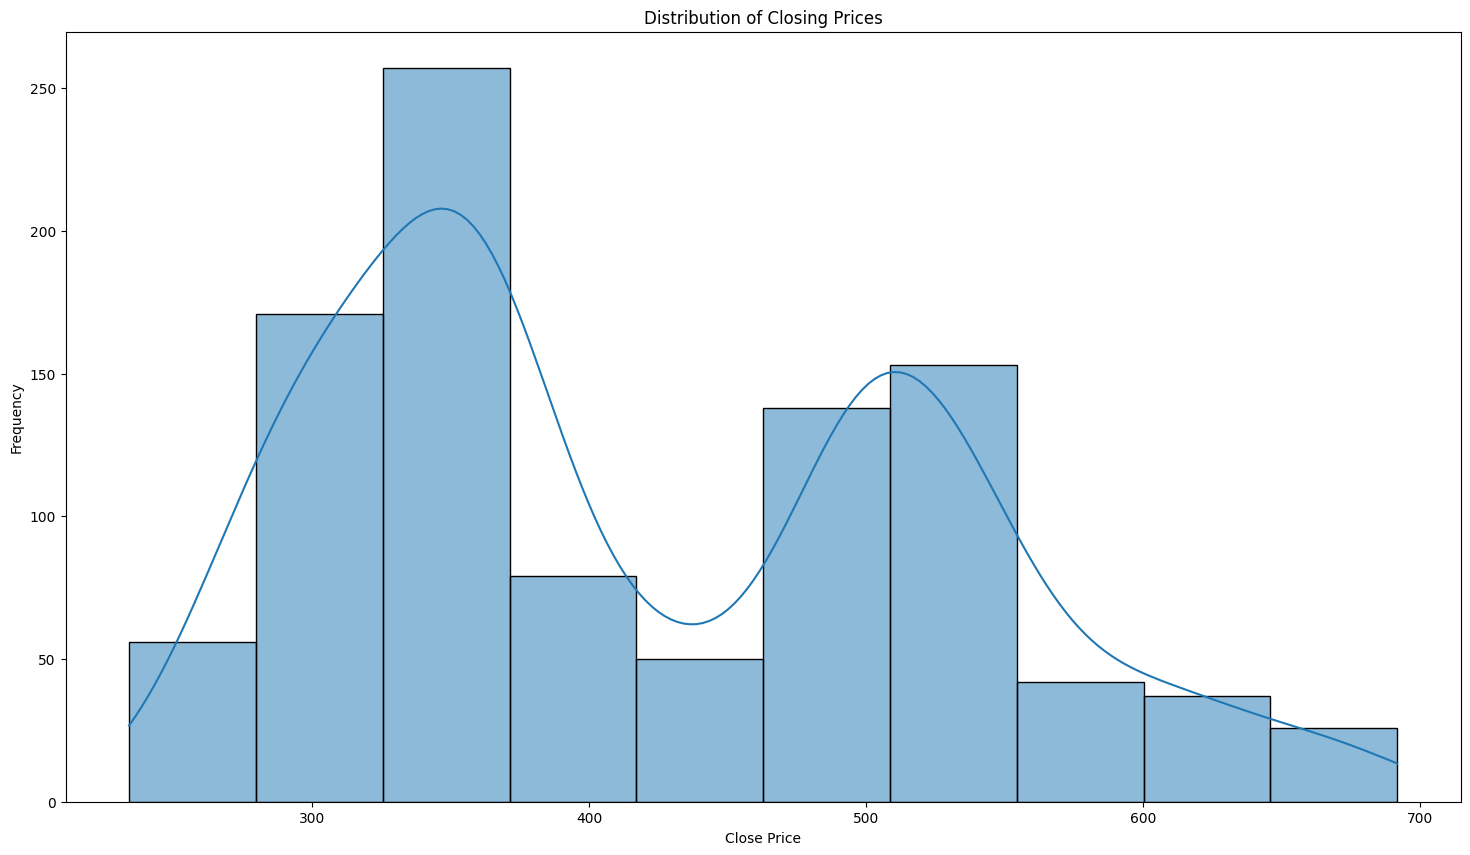

In [3]:
import matplotlib.pyplot as plt
import seaborn as sns

# plot the distribution of the target variable 'Close' prices with KDE overlay on the histogram
plt.figure(figsize=(18, 10))
sns.histplot(NetflixData['Close'], kde=True, bins=10)
plt.title('Distribution of Closing Prices')
plt.xlabel('Close Price')
plt.ylabel('Frequency')

array([[<Axes: title={'center': 'Close'}>]], dtype=object)

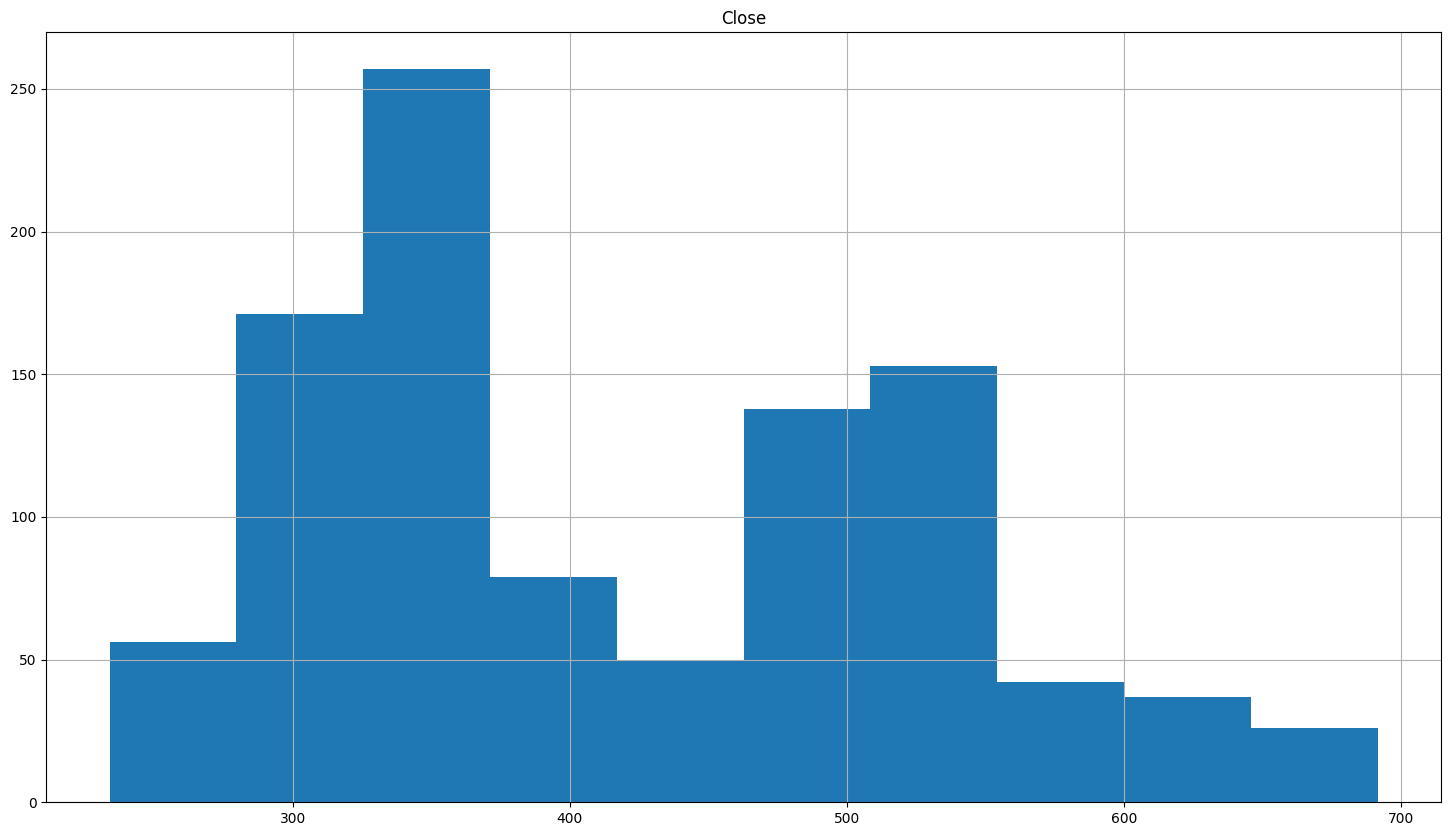

In [4]:
NetflixData.hist(['Close'], bins=10, figsize=(18, 10))

The histogram above shows us the typical range of closing prices and their frequency. We can see a bimodal distribution of the closing prices, the first peak is in the 300 - 400 range, with the second peak around the 500 range. There appear to be no data anomalies or outliers and no obvious skewing of data.

## 5. Data Exploration at Basic Level

In [5]:
# view the first 10 sample rows of the netflix dataset
NetflixData.head(10)

,Date,Open,High,Low,Close,Adj Close,Volume
0,2018-02-05,262.000000,267.899994,250.029999,254.259995,254.259995,11896100
1,2018-02-06,247.699997,266.700012,245.000000,265.720001,265.720001,12595800
2,2018-02-07,266.579987,272.450012,264.329987,264.559998,264.559998,8981500
3,2018-02-08,267.079987,267.619995,250.000000,250.100006,250.100006,9306700
4,2018-02-09,253.850006,255.800003,236.110001,249.470001,249.470001,16906900
5,2018-02-12,252.139999,259.149994,249.000000,257.950012,257.950012,8534900
6,2018-02-13,257.290009,261.410004,254.699997,258.269989,258.269989,6855200
7,2018-02-14,260.470001,269.880005,260.329987,266.000000,266.000000,10972000
8,2018-02-15,270.029999,280.500000,267.630005,280.269989,280.269989,10759700
9,2018-02-16,278.730011,281.959991,275.690002,278.519989,278.519989,8312400


In [6]:
# view the last 10 sample rows of the netflix dataset
NetflixData.tail(10)

,Date,Open,High,Low,Close,Adj Close,Volume
999,2022-01-24,383.910004,387.260010,351.459991,387.149994,387.149994,32346000
1000,2022-01-25,379.140015,387.709991,365.130005,366.420013,366.420013,15145800
1001,2022-01-26,378.269989,382.660004,356.619995,359.700012,359.700012,12684000
1002,2022-01-27,382.059998,394.799988,378.100006,386.700012,386.700012,24324700
1003,2022-01-28,386.760010,387.000000,372.079987,384.359985,384.359985,11966600
1004,2022-01-31,401.970001,427.700012,398.200012,427.140015,427.140015,20047500
1005,2022-02-01,432.959991,458.480011,425.540009,457.130005,457.130005,22542300
1006,2022-02-02,448.250000,451.980011,426.480011,429.480011,429.480011,14346000
1007,2022-02-03,421.440002,429.260010,404.279999,405.600006,405.600006,9905200
1008,2022-02-04,407.309998,412.769989,396.640015,410.170013,410.170013,7782400


In [7]:
# view summarised information and data types of columns
NetflixData.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1009 entries, 0 to 1008
Data columns (total 7 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   Date       1009 non-null   object 
 1   Open       1009 non-null   float64
 2   High       1009 non-null   float64
 3   Low        1009 non-null   float64
 4   Close      1009 non-null   float64
 5   Adj Close  1009 non-null   float64
 6   Volume     1009 non-null   int64  
dtypes: float64(5), int64(1), object(1)
memory usage: 55.3+ KB


The above shows the datatypes of each column

In [8]:
# view descriptive statistical information about dataset
NetflixData.describe()

,Open,High,Low,Close,Adj Close,Volume
count,1009.000000,1009.000000,1009.000000,1009.000000,1009.000000,1.009000e+03
mean,419.059673,425.320703,412.374044,419.000733,419.000733,7.570685e+06
std,108.537532,109.262960,107.555867,108.289999,108.289999,5.465535e+06
min,233.919998,250.649994,231.229996,233.880005,233.880005,1.144000e+06
25%,331.489990,336.299988,326.000000,331.619995,331.619995,4.091900e+06
50%,377.769989,383.010010,370.880005,378.670013,378.670013,5.934500e+06
75%,509.130005,515.630005,502.529999,509.079987,509.079987,9.322400e+06
max,692.349976,700.989990,686.090027,691.690002,691.690002,5.890430e+07


Using the .describe method we can see the mean, standard deviation, min/max values of the stock prices, and the number of non-empty values. As there are consistently 1009 values for ech column and the row total is 1009, there are no null values.

We can also observe that the 'Close' and 'Adj Close' columns contain identical values, indicating that no adjustments were made for splits, dividends, or capital gains to the closing price for this 5 year time period.

In [9]:
# identify categorical and continous columns in dataset
NetflixData.nunique()

Date         1009
Open          976
High          983
Low           989
Close         988
Adj Close     988
Volume       1005
dtype: int64

As we can see avove, Open, High, Low, Close, Adj Close, and Volume variables are continous and will be seleected for the model, with the exception of 'Adj Close' which as mentioned before is identical to 'Close' and will thus be left out of our analysis.

## 6. Identifying and Rejecting Useless Columns

* the 'Adj Close' column can potentially be removed as it holds identical values to the 'Close' column. This could be due to no adjustments being made to the closing prices for the duration of the dataset

In [10]:
# remove the 'Adj Close' column from the dataset
NetflixData_clean = NetflixData.drop(columns = ["Adj Close"])

# save clean data to new csv file
NetflixData_clean.to_csv("netflix_clean.csv", index = False)

# load the 'clean' netflix dataset by creating a path variable and dataframe
path = "/content/drive/MyDrive/Colab Notebooks/ST1 A9 Capstone Project/netflix_clean.csv"
NetflixData_clean = pd.read_csv(path)

# view the dataframe
NetflixData_clean

,Date,Open,High,Low,Close,Volume
0,2018-02-05,262.000000,267.899994,250.029999,254.259995,11896100
1,2018-02-06,247.699997,266.700012,245.000000,265.720001,12595800
2,2018-02-07,266.579987,272.450012,264.329987,264.559998,8981500
3,2018-02-08,267.079987,267.619995,250.000000,250.100006,9306700
4,2018-02-09,253.850006,255.800003,236.110001,249.470001,16906900
...,...,...,...,...,...,...
1004,2022-01-31,401.970001,427.700012,398.200012,427.140015,20047500
1005,2022-02-01,432.959991,458.480011,425.540009,457.130005,22542300
1006,2022-02-02,448.250000,451.980011,426.480011,429.480011,14346000
1007,2022-02-03,421.440002,429.260010,404.279999,405.600006,9905200


## 7. Visual Exploratory Data Analysis

array([[<Axes: title={'center': 'Open'}>,
        <Axes: title={'center': 'High'}>],
       [<Axes: title={'center': 'Low'}>,
        <Axes: title={'center': 'Close'}>],
       [<Axes: title={'center': 'Volume'}>, <Axes: >]], dtype=object)

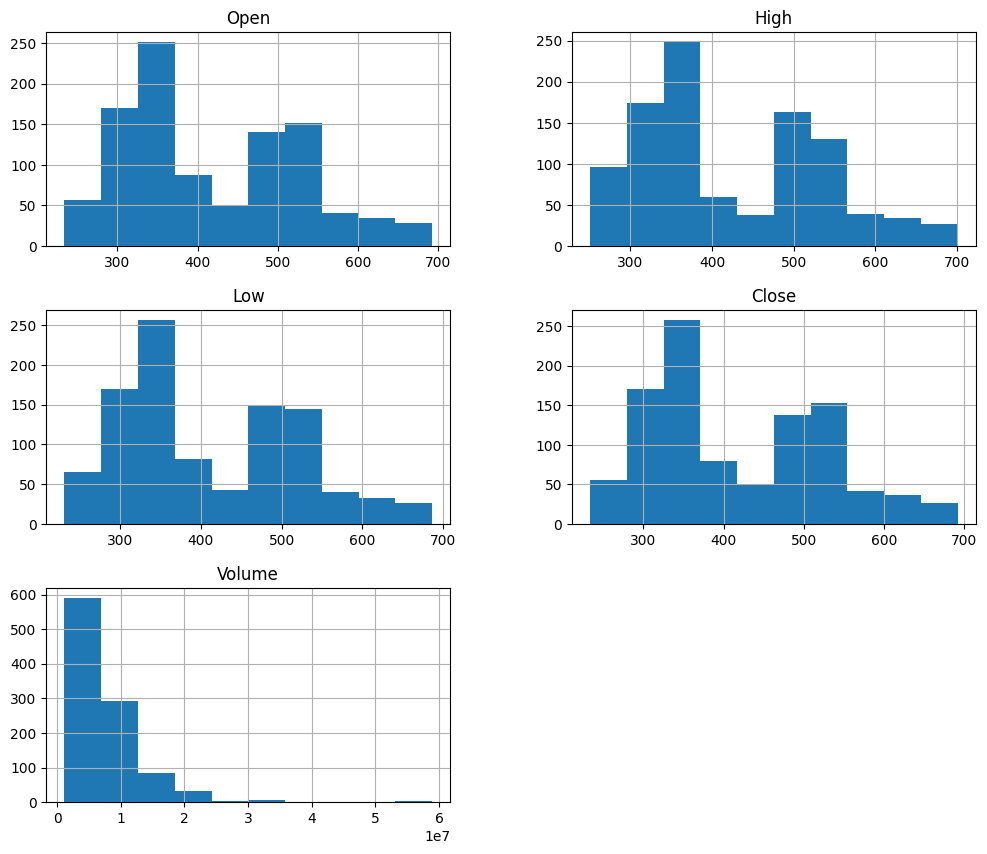

In [11]:
# view data distribution of different columns with histogram plots
NetflixData.hist(['Open', 'High', 'Low', 'Close', 'Volume'], figsize = (12, 10))

array([[<Axes: title={'center': 'Volume'}>]], dtype=object)

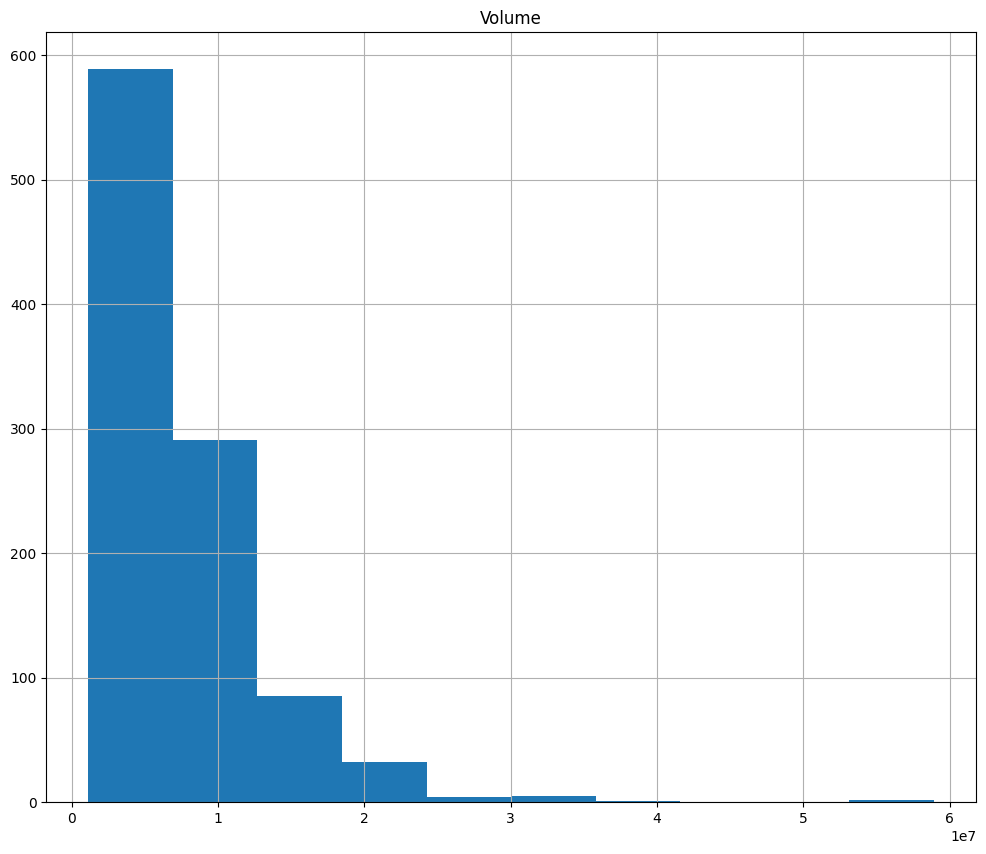

In [12]:
# changing the bin size to 50 in order to get a clearer view of the outliers in daily volume
NetflixData.hist(['Volume'], figsize = (12, 10))

As seen above, all columns except the 'Volume' column have a good distribution of data. The daily traiding 'Volume' of Netflix stocks has a few outliers just below the 60 million mark. We will replace these values with the nearest logical alternative.   

## 8. Removal of Outliers and Missing Values

In [13]:
# finding nearest values below 60 million outliers
NetflixData_clean['Volume'][NetflixData_clean['Volume']<6e7].sort_values(ascending=False)

998    58904300
112    58410400
428    38258900
49     33866500
744    32637500
         ...   
979     1621100
896     1595500
883     1367800
982     1287200
728     1144000
Name: Volume, Length: 1009, dtype: int64

Above results show two outlier values in the 58 million range, we will replace them with the next closest value of 38.25 million.

<ipython-input-14-8844ad6c5661>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  NetflixData_clean['Volume'][NetflixData_clean['Volume']>4e7] = 3.825e7


array([[<Axes: title={'center': 'Volume'}>]], dtype=object)

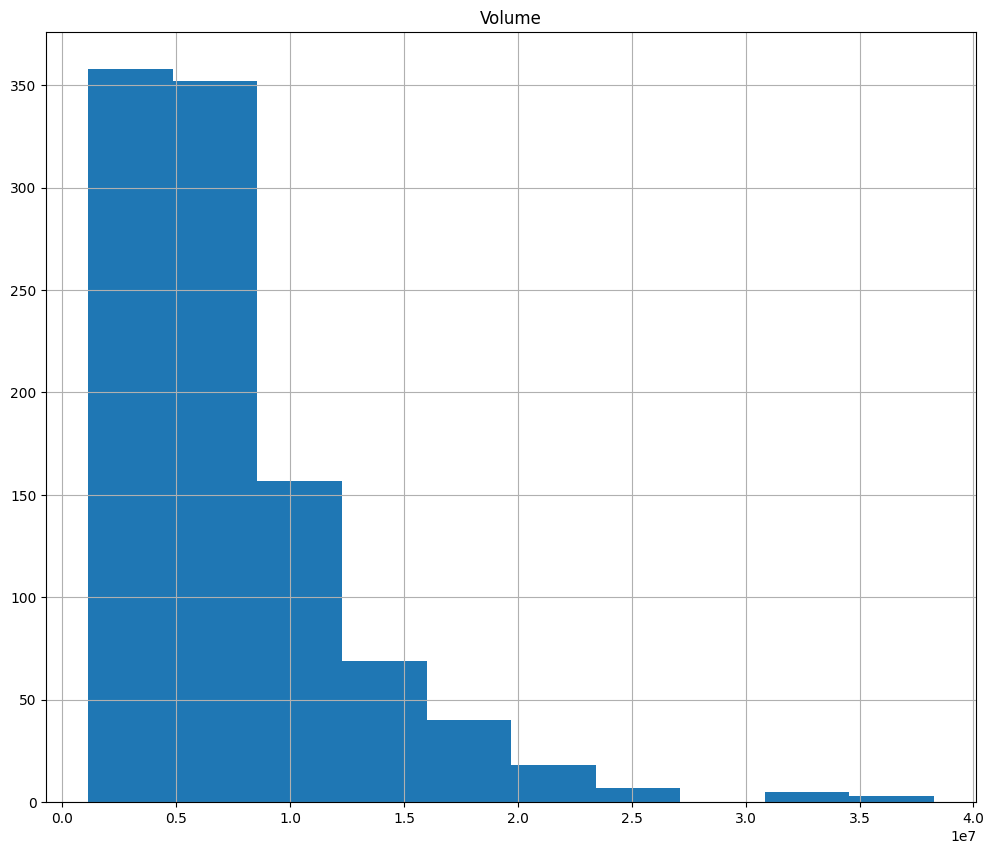

In [14]:
# Replacing outliers with nearest possibe value
NetflixData_clean['Volume'][NetflixData_clean['Volume']>4e7] = 3.825e7

NetflixData_clean.hist(['Volume'], figsize = (12, 10))

In [15]:
# checking for missing values in each column
NetflixData_clean.isnull().sum()


Date      0
Open      0
High      0
Low       0
Close     0
Volume    0
dtype: int64

As there are no missing values, no removal of rows is needed.

## 9. Feature Selection Based on Data Distribution

Based on the data distrubution from the histograms above, 'Open', 'High', 'Low', and 'Close' share very simillar distribution patterns, this is logical as they move in tandem. Each day's 'Open' stock price is coming off the previous day's 'Close' price and the Highs and Lows are with the same dayily block.

The 'Volume' feature has a unique distribution as it is capturing the quantity of stocks over time, this in turn has a large influence on price varriables.

To better understand the relationships between these features and our target varriable, the 'Close' price, we will perform some visual statistical correlation analysis.

We will explore the the relationships between varriables through the following methods:
* scatter plots, as they are continous values
* heatmap of the correlation matrix
* statistical measurements of the relationship strength between varriables

## 10. Visual and Statistic Correlation Analysis

### Continuous Vs Continuous - Scatter Plot

* When the Target variable is continuous and the predictor is also continuous, we can visualize the relationship between the two variables using scatter plot and measure the strength of relation using a metric called pearson's correlation value.

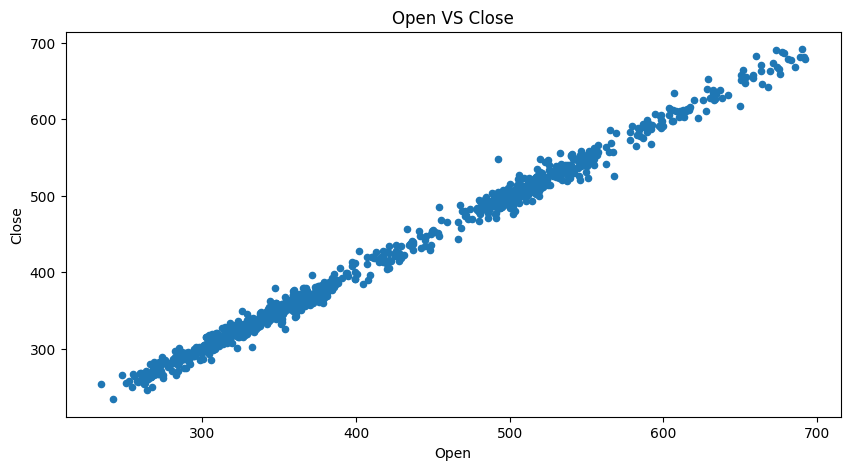

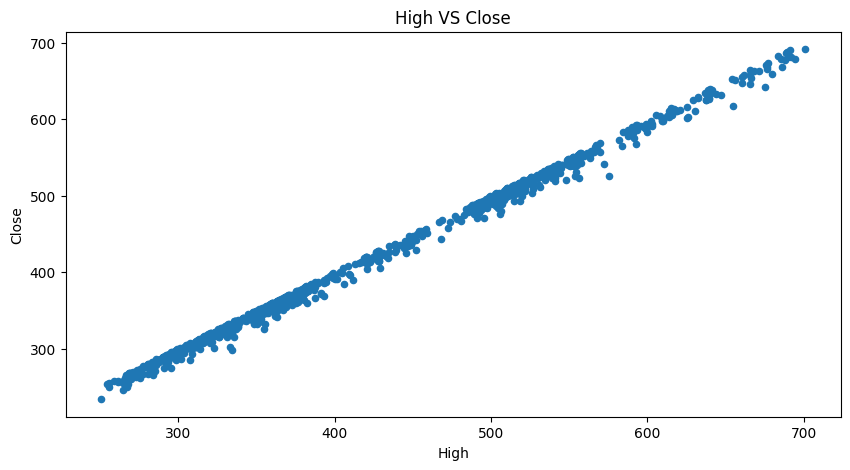

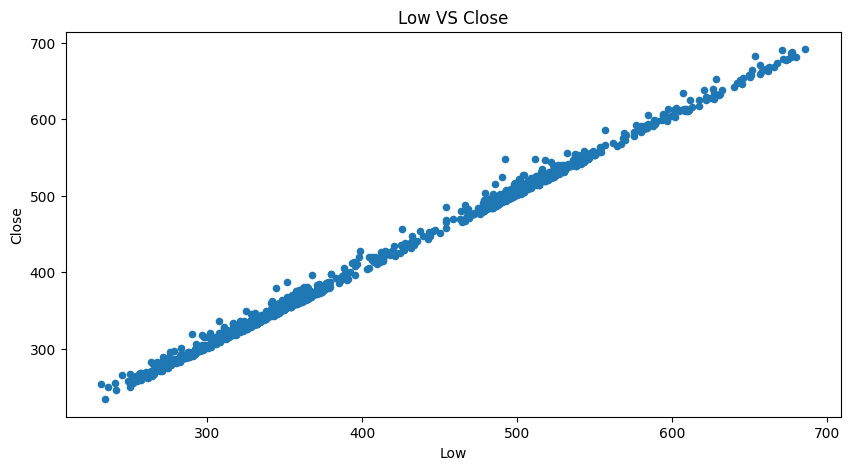

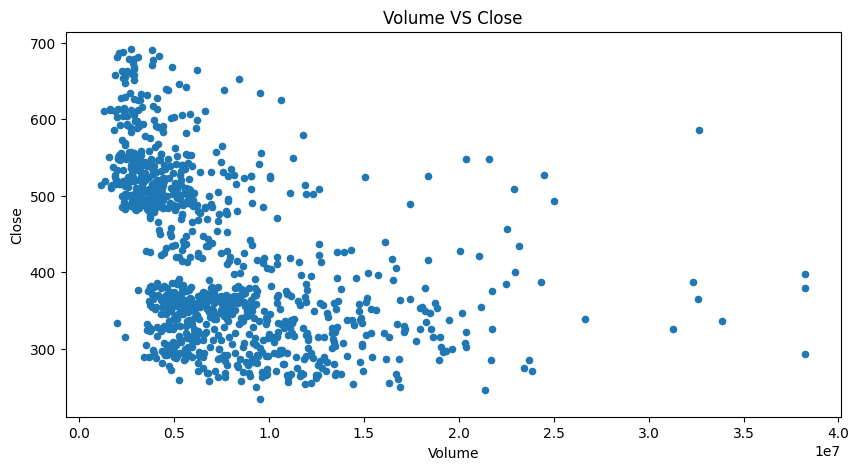

In [16]:
ContinuousCols = ['Open', 'High', 'Low', 'Volume']

for predictor in ContinuousCols:
  NetflixData_clean.plot.scatter(x=predictor, y='Close', figsize=(10,5), title = predictor + " VS " + 'Close')

We will convert the 'Date' column into datetime format, we will also extract the year, month, day, and quarter into seperate features. This will help us see any patterns overtime in the data.

We will also create a 'Daily Range' feature to capture the fluctuations between daily high and low prices - this should provide additional contex and may improve our model.  

In [37]:
# convert 'Date' column into datetime format ??and set it as index??
NetflixData_clean["Date"] = pd.to_datetime(NetflixData_clean["Date"])

# extract time-based features
NetflixData_clean['Year'] = NetflixData_clean['Date'].dt.year
NetflixData_clean['Month'] = NetflixData_clean['Date'].dt.month
NetflixData_clean['Day'] = NetflixData_clean['Date'].dt.day
NetflixData_clean['DayOfWeek'] = NetflixData_clean['Date'].dt.dayofweek
NetflixData_clean['Quarter'] = NetflixData_clean['Date'].dt.quarter

# create 'Daily Range' feature
NetflixData_clean['Daily Range'] = NetflixData_clean['High'] - NetflixData_clean['Low']

NetflixData_clean.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1009 entries, 0 to 1008
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype         
---  ------       --------------  -----         
 0   Date         1009 non-null   datetime64[ns]
 1   Open         1009 non-null   float64       
 2   High         1009 non-null   float64       
 3   Low          1009 non-null   float64       
 4   Close        1009 non-null   float64       
 5   Volume       1009 non-null   int64         
 6   Year         1009 non-null   int32         
 7   Month        1009 non-null   int32         
 8   Day          1009 non-null   int32         
 9   DayOfWeek    1009 non-null   int32         
 10  Quarter      1009 non-null   int32         
 11  Daily Range  1009 non-null   float64       
dtypes: datetime64[ns](1), float64(5), int32(5), int64(1)
memory usage: 75.0 KB


In [36]:
NetflixData_clean.head()

,Date,Open,High,Low,Close,Volume,Year,Month,Day,DayOfWeek,Quarter,Daily Range
0,2018-02-05,262.000000,267.899994,250.029999,254.259995,11896100,2018,2,5,0,1,17.869995
1,2018-02-06,247.699997,266.700012,245.000000,265.720001,12595800,2018,2,6,1,1,21.700012
2,2018-02-07,266.579987,272.450012,264.329987,264.559998,8981500,2018,2,7,2,1,8.120025
3,2018-02-08,267.079987,267.619995,250.000000,250.100006,9306700,2018,2,8,3,1,17.619995
4,2018-02-09,253.850006,255.800003,236.110001,249.470001,16906900,2018,2,9,4,1,19.690002


We will now calculate the correlation between these variables using Pearson's correlation coefficient via the .corr() method. This will calculate the covariance between two features x and y (numerator) divided by the product of their standard deviations (denominator).

(-0.5, 1087.5, 561.5, -0.5)

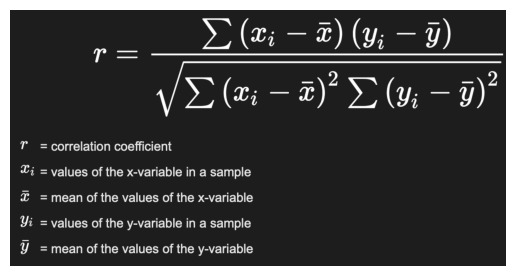

In [19]:
import matplotlib.image as mpimg
# show pearson's correlation coefficient formula
img = mpimg.imread('/content/drive/MyDrive/Colab Notebooks/ST1 A9 Capstone Project/pearsons_correlation.png')
plt.imshow(img)
plt.axis("off")

Text(0.5, 1.0, 'Correlation Matrix Heatmap')

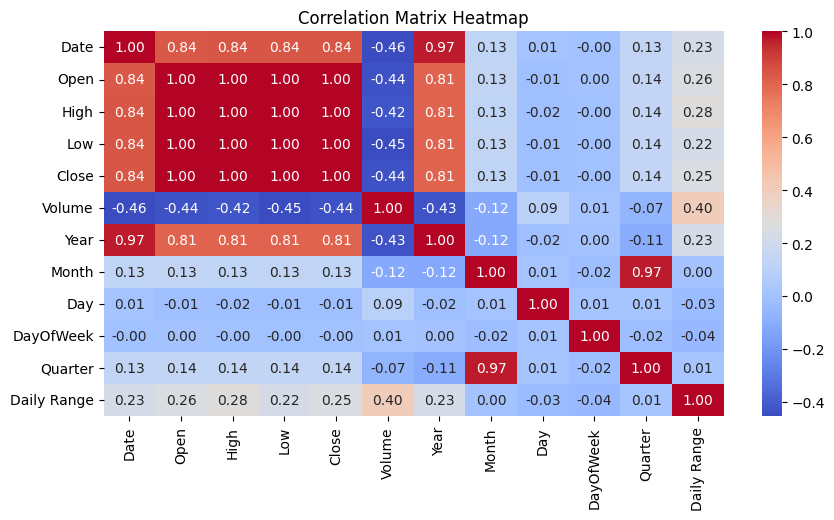

In [20]:
# calculate correlation matrix
corr_matrix = NetflixData_clean.corr()

# create correlation matrix heatmap
plt.figure(figsize=(10,5))
heatmap = sns.heatmap(corr_matrix, annot=True, fmt=".2f", cmap='coolwarm')
plt.title("Correlation Matrix Heatmap")


The correlation matrix above shows the correlation coefficients between two variables in the value ranges -1 to 1.

* 1 (red) indicates a perfect positive correlation, as one variable increases, so does the other in proportion.
* -1 (blue) indicates a perfect negative correlation, maning as one variable decreases, so does the other in proportion.
* 0 (white) would indicate no correlation between varriables.

* We can see that there is a near perfect positive correlation between the 'Open', 'High', 'Low', and 'Close' prices. This is expected as these prices are recorded within the same trading day and all move in tandem.
* 'Date' and 'Year' have a high positive correlation, as the date increases with the year.
* 'Volume' is showing a negative correlation between all other variables, which indicates that when the daily stock prices are higher, the volume of trades is lower and vice versa.  
* 'Daily Range' has a stronger correlation with 'Volume' than with any other varriable. This indicated that on days with higher price fluctuations there is also a higher trading volume.

* The 'Open', 'High', and 'Low', variables would be ideal for predicting the 'Close' price. The 'Volume' variable, while not as highly correlated would also be useful in this prediction.

In [21]:
# Filtering only those columns where absolute correlation > 0.4 with Target Variable
corr_matrix['Close'][abs(corr_matrix['Close']) > 0.4 ]

Date      0.841384
Open      0.996812
High      0.998551
Low       0.998544
Close     1.000000
Volume   -0.436176
Year      0.810160
Name: Close, dtype: float64

Final columns selected:
* 'Open', 'High', 'Low', and 'Volume'

In [22]:
SelectedColumns = ['Open', 'High', 'Low', 'Volume', 'Close']

# selecting final columns
DataForML = NetflixData_clean[SelectedColumns]
DataForML.head()

,Open,High,Low,Volume,Close
0,262.000000,267.899994,250.029999,11896100,254.259995
1,247.699997,266.700012,245.000000,12595800,265.720001
2,266.579987,272.450012,264.329987,8981500,264.559998
3,267.079987,267.619995,250.000000,9306700,250.100006
4,253.850006,255.800003,236.110001,16906900,249.470001


In [23]:
# saving final data subset for reference during deployment
DataForML.to_pickle('DataForML.pkl')

## 11. Data Conversion to Numeric Values for Machine Learning/Predictive Analysis

There is no need for numeric data conversion with the netflix stock price dataset.


## 12. Training/Testing Sampling and K-fold cross Validation

In [24]:
# Printing all the column names for our reference
DataForML.columns

Index(['Open', 'High', 'Low', 'Volume', 'Close'], dtype='object')

In [25]:
#Separate Target Variable and Predictor Variables
TargetVariable='Close'
Predictors=['Open', 'High', 'Low', 'Volume']

X = DataForML[Predictors].values
y = DataForML[TargetVariable].values

# Split the data into training and testing set
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=428)

## 13. Investigating Multiple Regression Algorithms

In [26]:
#Multiple Linear Regression
from sklearn.linear_model import LinearRegression
RegModel = LinearRegression()

# Printing all the parameters of Linear regression
print(RegModel)

# Creating the model on Training Data
LREG=RegModel.fit(X_train,y_train)
prediction=LREG.predict(X_test)

from sklearn import metrics
# Measuring Goodness of fit in Training data
print('R2 Value:',metrics.r2_score(y_train, LREG.predict(X_train)))

###########################################################################
print('\n##### Model Validation and Accuracy Calculations ##########')

# Printing some sample values of prediction
TestingDataResults=pd.DataFrame(data=X_test, columns=Predictors)
TestingDataResults[TargetVariable]=y_test
TestingDataResults[('Predicted'+TargetVariable)]=np.round(prediction)

# Printing sample prediction values
print(TestingDataResults.head())

# Calculating the error for each row
TestingDataResults['APE']=100 * ((abs(
  TestingDataResults['Close']-TestingDataResults['PredictedClose']))/TestingDataResults['Close'])

MAPE=np.mean(TestingDataResults['APE'])
MedianMAPE=np.median(TestingDataResults['APE'])

Accuracy =100 - MAPE
MedianAccuracy=100- MedianMAPE
print('Mean Accuracy on test data:', Accuracy) # Can be negative sometimes due to outlier
print('Median Accuracy on test data:', MedianAccuracy)

# Defining a custom function to calculate accuracy
# Make sure there are no zeros in the Target variable if you are using MAPE
def Accuracy_Score(orig,pred):
    MAPE = np.mean(100 * (np.abs(orig-pred)/orig))
    #print('#'*70,'Accuracy:', 100-MAPE)
    return(100-MAPE)

# Custom Scoring MAPE calculation
from sklearn.metrics import make_scorer
custom_Scoring=make_scorer(Accuracy_Score, greater_is_better=True)

# Importing cross validation function from sklearn
from sklearn.model_selection import cross_val_score

# Running 10-Fold Cross validation on a given algorithm
# Passing full data X and y because the K-fold will split the data and automatically choose train/test
Accuracy_Values=cross_val_score(RegModel, X , y, cv=10, scoring=custom_Scoring)
print('\nAccuracy values for 10-fold Cross Validation:\n',Accuracy_Values)
print('\nFinal Average Accuracy of the model:', round(Accuracy_Values.mean(),2))

LinearRegression()
R2 Value: 0.9986063905763726

##### Model Validation and Accuracy Calculations ##########
         Open        High         Low     Volume       Close  PredictedClose
0  294.500000  299.149994  291.790009  4777100.0  298.600006           296.0
1  504.010010  505.410004  497.739990  2482600.0  499.079987           500.0
2  544.270020  544.270020  532.020020  3787400.0  537.219971           535.0
3  533.200012  536.369995  526.020020  4502700.0  534.450012           530.0
4  628.890015  654.010010  628.650024  8437100.0  653.159973           649.0
Mean Accuracy on test data: 99.3356982280328
Median Accuracy on test data: 99.48110950732801

Accuracy values for 10-fold Cross Validation:
 [99.23583254 99.21933844 99.19268473 99.39740205 99.42763392 98.92104084
 99.20739869 99.40791956 99.62197898 99.23667668]

Final Average Accuracy of the model: 99.29


XGBRegressor(base_score=None, booster='gbtree', callbacks=None,
             colsample_bylevel=None, colsample_bynode=None,
             colsample_bytree=None, device=None, early_stopping_rounds=None,
             enable_categorical=False, eval_metric=None, feature_types=None,
             gamma=None, grow_policy=None, importance_type=None,
             interaction_constraints=None, learning_rate=0.1, max_bin=None,
             max_cat_threshold=None, max_cat_to_onehot=None,
             max_delta_step=None, max_depth=2, max_leaves=None,
             min_child_weight=None, missing=nan, monotone_constraints=None,
             multi_strategy=None, n_estimators=1000, n_jobs=None,
             num_parallel_tree=None, objective='reg:linear', ...)


/usr/local/lib/python3.10/dist-packages/xgboost/core.py:160: UserWarning: [03:05:54] WARNING: /workspace/src/objective/regression_obj.cu:209: reg:linear is now deprecated in favor of reg:squarederror.
  warnings.warn(smsg, UserWarning)


R2 Value: 0.9995853048674724

##### Model Validation and Accuracy Calculations ##########
         Open        High         Low     Volume       Close  PredictedClose
0  294.500000  299.149994  291.790009  4777100.0  298.600006           295.0
1  504.010010  505.410004  497.739990  2482600.0  499.079987           501.0
2  544.270020  544.270020  532.020020  3787400.0  537.219971           535.0
3  533.200012  536.369995  526.020020  4502700.0  534.450012           531.0
4  628.890015  654.010010  628.650024  8437100.0  653.159973           634.0
Mean Accuracy on test data: 99.0656398638736
Median Accuracy on test data: 99.25694632259197


/usr/local/lib/python3.10/dist-packages/xgboost/core.py:160: UserWarning: [03:05:55] WARNING: /workspace/src/objective/regression_obj.cu:209: reg:linear is now deprecated in favor of reg:squarederror.
  warnings.warn(smsg, UserWarning)
/usr/local/lib/python3.10/dist-packages/xgboost/core.py:160: UserWarning: [03:05:56] WARNING: /workspace/src/objective/regression_obj.cu:209: reg:linear is now deprecated in favor of reg:squarederror.
  warnings.warn(smsg, UserWarning)
/usr/local/lib/python3.10/dist-packages/xgboost/core.py:160: UserWarning: [03:05:57] WARNING: /workspace/src/objective/regression_obj.cu:209: reg:linear is now deprecated in favor of reg:squarederror.
  warnings.warn(smsg, UserWarning)
/usr/local/lib/python3.10/dist-packages/xgboost/core.py:160: UserWarning: [03:05:58] WARNING: /workspace/src/objective/regression_obj.cu:209: reg:linear is now deprecated in favor of reg:squarederror.
  warnings.warn(smsg, UserWarning)
/usr/local/lib/python3.10/dist-packages/xgboost/core.py:


Accuracy values for 10-fold Cross Validation:
 [98.8851397  98.88091272 98.94729612 99.28954867 99.04445946 97.9602696
 98.95190945 99.09210303 99.43022354 95.5065668 ]

Final Average Accuracy of the model: 98.6


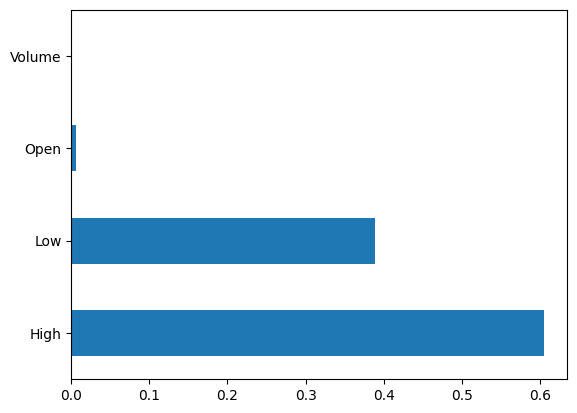

In [27]:
# Xtreme Gradient Boosting (XGBoost)
from xgboost import XGBRegressor
RegModel=XGBRegressor(max_depth=2,
                      learning_rate=0.1,
                      n_estimators=1000,
                      objective='reg:linear',
                      booster='gbtree')

# Printing all the parameters of XGBoost
print(RegModel)

# Creating the model on Training Data
XGB=RegModel.fit(X_train,y_train)
prediction=XGB.predict(X_test)

from sklearn import metrics
# Measuring Goodness of fit in Training data
print('R2 Value:',metrics.r2_score(y_train, XGB.predict(X_train)))

# Plotting the feature importance for Top 10 most important columns
%matplotlib inline
feature_importances = pd.Series(XGB.feature_importances_, index=Predictors)
feature_importances.nlargest(10).plot(kind='barh')
###########################################################################
print('\n##### Model Validation and Accuracy Calculations ##########')

# Printing some sample values of prediction
TestingDataResults=pd.DataFrame(data=X_test, columns=Predictors)
TestingDataResults[TargetVariable]=y_test
TestingDataResults[('Predicted'+TargetVariable)]=np.round(prediction)

# Printing sample prediction values
print(TestingDataResults.head())

# Calculating the error for each row
TestingDataResults['APE']=100 * ((abs(
  TestingDataResults['Close']-TestingDataResults['PredictedClose']))/TestingDataResults['Close'])


MAPE=np.mean(TestingDataResults['APE'])
MedianMAPE=np.median(TestingDataResults['APE'])

Accuracy =100 - MAPE
MedianAccuracy=100- MedianMAPE
print('Mean Accuracy on test data:', Accuracy) # Can be negative sometimes due to outlier
print('Median Accuracy on test data:', MedianAccuracy)


# Defining a custom function to calculate accuracy
# Make sure there are no zeros in the Target variable if you are using MAPE
def Accuracy_Score(orig,pred):
    MAPE = np.mean(100 * (np.abs(orig-pred)/orig))
    #print('#'*70,'Accuracy:', 100-MAPE)
    return(100-MAPE)

# Custom Scoring MAPE calculation
from sklearn.metrics import make_scorer
custom_Scoring=make_scorer(Accuracy_Score, greater_is_better=True)

# Importing cross validation function from sklearn
from sklearn.model_selection import cross_val_score

# Running 10-Fold Cross validation on a given algorithm
# Passing full data X and y because the K-fold will split the data and automatically choose train/test
Accuracy_Values=cross_val_score(RegModel, X , y, cv=10, scoring=custom_Scoring)
print('\nAccuracy values for 10-fold Cross Validation:\n',Accuracy_Values)
print('\nFinal Average Accuracy of the model:', round(Accuracy_Values.mean(),2))

<Axes: >

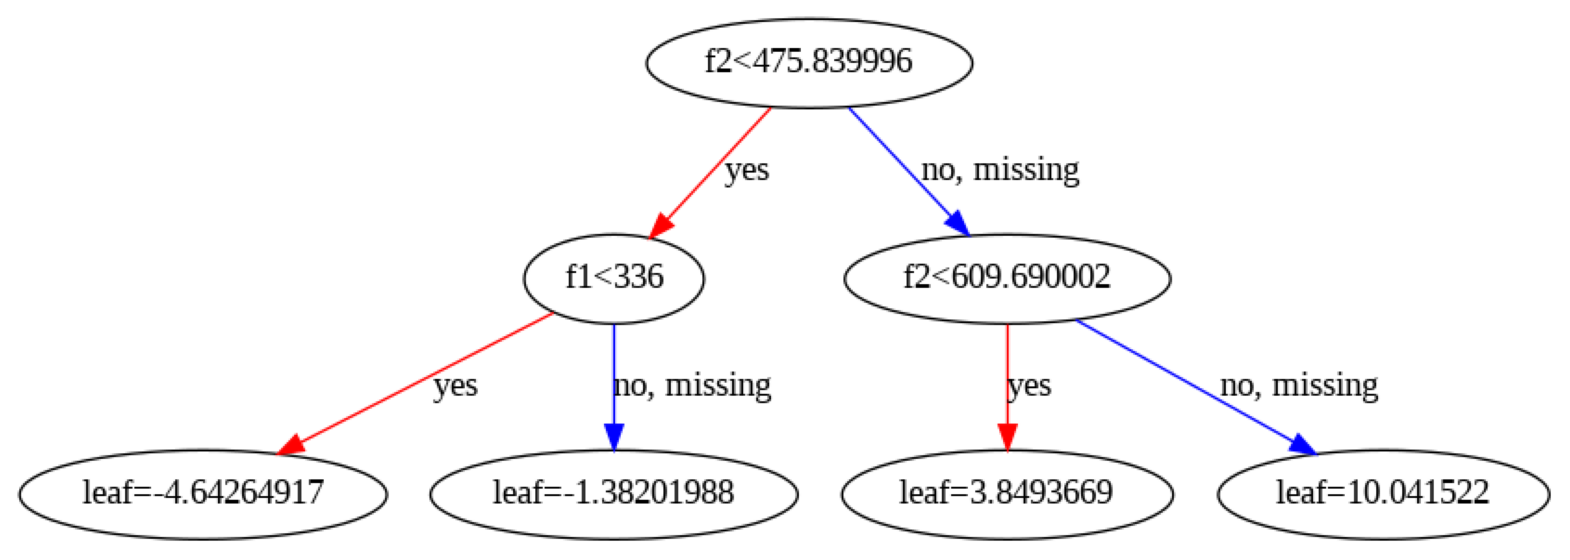

In [28]:
#Plotting a single Decision tree out of XGBoost
from xgboost import plot_tree
import matplotlib.pyplot as plt
fig, ax = plt.subplots(figsize=(20, 8))
plot_tree(XGB, num_trees=10, ax=ax)

We will need to standardise our data before attampting Support Vector Machines(SVM)Regressor

In [38]:

### Standardization of data ###
from sklearn.preprocessing import StandardScaler, MinMaxScaler
# Choose either standardization or Normalization
# On this data Min Max Normalization produced better results

# Choose between standardization and MinMAx normalization
PredictorScaler=StandardScaler()
#PredictorScaler=MinMaxScaler()

# Storing the fit object for later reference
PredictorScalerFit=PredictorScaler.fit(X)

# Generating the standardized values of X
X=PredictorScalerFit.transform(X)

# Split the data into training and testing set
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)


In [39]:

# Sanity check for the sampled data
print(X_train.shape)
print(y_train.shape)
print(X_test.shape)
print(y_test.shape)


(706, 4)
(706,)
(303, 4)
(303,)


In [40]:
# Support Vector Machines(SVM)
from sklearn import svm
RegModel = svm.SVR(C=50, kernel='rbf', gamma=0.01)

# Printing all the parameters
print(RegModel)

# Creating the model on Training Data
SVM=RegModel.fit(X_train,y_train)
prediction=SVM.predict(X_test)

from sklearn import metrics
# Measuring Goodness of fit in Training data
print('R2 Value:',metrics.r2_score(y_train, SVM.predict(X_train)))

# Plotting the feature importance for Top 10 most important columns
# The built in attribute SVM.coef_ works only for linear kernel
%matplotlib inline
#feature_importances = pd.Series(SVM.coef_[0], index=Predictors)
#feature_importances.nlargest(10).plot(kind='barh')

###########################################################################
print('\n##### Model Validation and Accuracy Calculations ##########')

# Printing some sample values of prediction
TestingDataResults=pd.DataFrame(data=X_test, columns=Predictors)
TestingDataResults[TargetVariable]=y_test
TestingDataResults[('Predicted'+TargetVariable)]=np.round(prediction)

# Printing sample prediction values
print(TestingDataResults.head())

# Calculating the error for each row
TestingDataResults['APE']=100 * ((abs(
  TestingDataResults['Close']-TestingDataResults['PredictedClose']))/TestingDataResults['Close'])

MAPE=np.mean(TestingDataResults['APE'])
MedianMAPE=np.median(TestingDataResults['APE'])

Accuracy =100 - MAPE
MedianAccuracy=100- MedianMAPE
print('Mean Accuracy on test data:', Accuracy) # Can be negative sometimes due to outlier
print('Median Accuracy on test data:', MedianAccuracy)

# Defining a custom function to calculate accuracy
# Make sure there are no zeros in the Target variable if you are using MAPE
def Accuracy_Score(orig,pred):
    MAPE = np.mean(100 * (np.abs(orig-pred)/orig))
    #print('#'*70,'Accuracy:', 100-MAPE)
    return(100-MAPE)

# Custom Scoring MAPE calculation
from sklearn.metrics import make_scorer
custom_Scoring=make_scorer(Accuracy_Score, greater_is_better=True)

# Importing cross validation function from sklearn
from sklearn.model_selection import cross_val_score

# Running 10-Fold Cross validation on a given algorithm
# Passing full data X and y because the K-fold will split the data and automatically choose train/test
Accuracy_Values=cross_val_score(RegModel, X , y, cv=10, scoring=custom_Scoring)
print('\nAccuracy values for 10-fold Cross Validation:\n',Accuracy_Values)
print('\nFinal Average Accuracy of the model:', round(Accuracy_Values.mean(),2))

SVR(C=50, gamma=0.01)
R2 Value: 0.9961092435826214

##### Model Validation and Accuracy Calculations ##########
       Open      High       Low    Volume       Close  PredictedClose
0  0.733661  0.779418  0.802548 -0.373174  509.640015           505.0
1  0.796344  0.759731  0.691202 -0.314487  494.730011           501.0
2  0.813858  0.816594  0.811199 -0.650904  500.859985           509.0
3 -0.310919 -0.347964 -0.320681 -0.698914  380.070007           382.0
4 -0.881788 -0.910830 -0.912946  1.703008  315.100006           320.0
Mean Accuracy on test data: 98.79422857351959
Median Accuracy on test data: 99.06714279018713

Accuracy values for 10-fold Cross Validation:
 [98.74215798 98.593666   98.59607344 99.17403515 98.65167011 98.61559042
 98.67804291 99.05019801 99.34728642 97.36146596]

Final Average Accuracy of the model: 98.68


## 14. Selection of the Best Model

The best performing models have been Linear Regression 99.29% accuracy and SVM Regressor 98.68% accuracy

* I will choose the Linear Regression model for the higher accuracy

In [41]:
# Separate Target Variable and Predictor Variables
TargetVariable = 'Close'

# Selecting the final set of predictors for the deployment
# Based on the variable importance charts of multiple algorithms above
Predictors = ['High', 'Low', 'Open', 'Volume']

X = DataForML[Predictors].values
y = DataForML[TargetVariable].values

### Sandardization of data ###
from sklearn.preprocessing import StandardScaler, MinMaxScaler

# data standardization
PredictorScaler=StandardScaler()

# Storing the fit object for later reference
PredictorScalerFit=PredictorScaler.fit(X)

# Generating the standardized values of X
X=PredictorScalerFit.transform(X)

print(X.shape)
print(y.shape)

(1009, 4)
(1009,)


In [43]:
# Importing cross validation function from sklearn
from sklearn.model_selection import cross_val_score

# Multiple Linear Regression
from sklearn.linear_model import LinearRegression
RegModel = LinearRegression()

# Running 10-Fold Cross validation on a given algorithm
# Passing full data X and y because the K-fold will split the data and automatically choose train/test
Accuracy_Values=cross_val_score(RegModel, X , y, cv=10, scoring=custom_Scoring)
print('\nAccuracy values for 10-fold Cross Validation:\n',Accuracy_Values)
print('\nFinal Average Accuracy of the model:', round(Accuracy_Values.mean(),2))


Accuracy values for 10-fold Cross Validation:
 [99.23583254 99.21933844 99.19268473 99.39740205 99.42763392 98.92104084
 99.20739869 99.40791956 99.62197898 99.23667668]

Final Average Accuracy of the model: 99.29


In [44]:
# Training the model on 100% Data available
Final_LR_Model = RegModel.fit(X,y)

In [46]:
# save model as a file

import pickle
import os

# Saving the Python objects as serialized files can be done using pickle library
# Here let us save the Final model
with open('Final_LR_Model.pkl', 'wb') as fileWriteStream:
    pickle.dump(Final_LR_Model, fileWriteStream)
    # Don't forget to close the filestream!
    fileWriteStream.close()

print('pickle file of Predictive Model is saved at Location:',os.getcwd())

pickle file of Predictive Model is saved at Location: /content


In [47]:
from re import IGNORECASE
# This Function can be called from any from any front end tool/website

def FunctionPredictResult(InputData):
    import pandas as pd
    Num_Inputs=InputData.shape[0]

    # Making sure the input data has same columns as it was used for training the model
    # Also, if standardization/normalization was done, then same must be done for new input

    # Appending the new data with the Training data
    DataForML=pd.read_pickle('DataForML.pkl')
    #InputData=InputData.append(DataForML, ignore_index=True)
    InputData = pd.concat([InputData, DataForML], ignore_index=True)

    # Generating dummy variables for rest of the nominal variables
    InputData=pd.get_dummies(InputData)

    # Maintaining the same order of columns as it was during the model training
    Predictors = ['High', 'Low', 'Open', 'Volume']

    # Generating the input values to the model
    X = InputData[Predictors].values[0:Num_Inputs]

    # Generating the standardized values of X since it was done while model training also
    X = PredictorScalerFit.transform(X)

    # Loading the Function from pickle file
    import pickle
    with open('Final_LR_Model.pkl', 'rb') as fileReadStream:
        PredictionModel=pickle.load(fileReadStream)
        # Don't forget to close the filestream!
        fileReadStream.close()

    # Genrating Predictions
    Prediction=PredictionModel.predict(X)
    PredictionResult=pd.DataFrame(Prediction, columns=['Prediction'])
    return(PredictionResult)

In [48]:
# Calling the function for some new data
NewSampleData=pd.DataFrame(data=[[260,241,245,7981000],[375,317,320,6981000]],columns=['High', 'Low', 'Open', 'Volume'])

print(NewSampleData)

# Calling the Function for prediction
FunctionPredictResult(InputData=NewSampleData)

   High  Low  Open   Volume
0   260  241   245  7981000
1   375  317   320  6981000


,Prediction
0,253.790536
1,360.568352


## 15. Deployment of the Best Model in Production

I have chosen to deploy my model using tkinter in pycharm, code bellow:

In [34]:
import tkinter as tk
from tkinter import messagebox
from tkinter import ttk
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression

class NetflixStockPriceApp:
    def __init__(self, master):
        self.master = master
        self.master.title('Netflix Stock Price Prediction')
        self.data = pd.read_pickle('DataForML.pkl')
        self.sliders = []

        self.X = self.data.drop('Close', axis=1).values
        self.y = self.data['Close'].values

        self.X_train, self.X_test, self.y_train, self.y_test = train_test_split(self.X, self.y, test_size=0.2, random_state=42)

        self.model = LinearRegression()
        self.model.fit(self.X_train, self.y_train)

        self.create_widgets()

    def create_widgets(self):
        for i, column in enumerate(self.data.columns[:-1]):
            label = tk.Label(self.master, text=column + ': ')
            label.grid(row=i, column=0)
            current_val_label = tk.Label(self.master, text='0.0')
            current_val_label.grid(row=i, column=2)
            slider = ttk.Scale(self.master, from_=self.data[column].min(), to=self.data[column].max(), orient="horizontal",
                               command=lambda val, label=current_val_label: label.config(text=f'{float(val):.2f}'))
            slider.grid(row=i, column=1)
            self.sliders.append((slider, current_val_label))

        predict_button = tk.Button(self.master, text='Predict Price', command=self.predict_price)
        predict_button.grid(row=len(self.data.columns[:-1]), columnspan=3)

    def predict_price(self):
        inputs = [float(slider.get()) for slider, _ in self.sliders]
        price = self.model.predict([inputs])
        messagebox.showinfo('Predicted Price', f'The predicted closing stock price is ${price[0]:.2f}')

if __name__ == '__main__':
    root = tk.Tk()
    app = NetflixStockPriceApp(root)
    root.mainloop()